In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import pandas as pd

## 동영상을 frame 단위로 쪼개서 저장하기
- 이미지를 중앙 기준으로 상하 30% 씩 자른 후 가로로 500px 기준으로도 자르기
    - 양쪽 140px 씩 버려서 가로가 500에 딱 맞아떨어지도록 함

In [117]:
path = "./data/mp4_train/*"
vid_list = glob(path)

for vid_path in tqdm(vid_list) :
    cap = cv2.VideoCapture(vid_path)
    cnt = 0
    first_15f_chk = 0
    while(cap.isOpened()) :
        ret, frame = cap.read()
        
        
        if ret and first_15f_chk > 14 :
            vid_path = vid_path.replace("/mp4_train\\", "\\new_train\\").replace(".mp4","_")
            
            h, w = frame.shape[:2]
            
            upper = int(h/2) - int(h * 0.3)
            bottom = int(h/2) + int(h * 0.3)
            frame_1 = frame[upper:bottom, 140:640, :]
            cv2.imwrite(vid_path+str(cnt).zfill(3)+".jpg", frame_1)
            
            frame_2 = frame[upper:bottom, 640:1140, :]
            cv2.imwrite(vid_path+str(cnt + 1).zfill(3)+".jpg", frame_2)
            
#             frame_3 = frame[upper:bottom, 800:1200, :]
#             cv2.imwrite(vid_path+str(cnt + 2)+".jpg", frame)
            
            cnt += 2
            
        elif first_15f_chk < 15 : 
            first_15f_chk += 1
        
        else :
            break
            
            
        
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2698/2698 [19:59<00:00,  2.25it/s]


## label 간 비율 구하기

In [10]:
path = "./data/train.csv"
label_csv = pd.read_csv(path)
label_csv

,sample_id,video_path,label
0,TRAIN_0000,./train/TRAIN_0000.mp4,7
1,TRAIN_0001,./train/TRAIN_0001.mp4,7
2,TRAIN_0002,./train/TRAIN_0002.mp4,0
3,TRAIN_0003,./train/TRAIN_0003.mp4,0
4,TRAIN_0004,./train/TRAIN_0004.mp4,1
...,...,...,...
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3
2694,TRAIN_2694,./train/TRAIN_2694.mp4,5
2695,TRAIN_2695,./train/TRAIN_2695.mp4,0
2696,TRAIN_2696,./train/TRAIN_2696.mp4,0


{0: 1783,
 1: 318,
 2: 51,
 3: 78,
 4: 13,
 5: 28,
 6: 3,
 7: 317,
 8: 30,
 9: 34,
 10: 4,
 11: 33,
 12: 6}

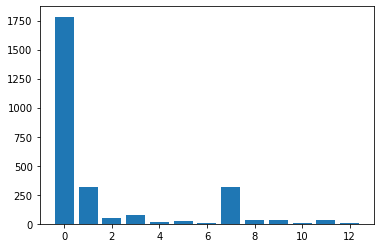

In [30]:
label_count = {i : label_csv[label_csv['label']==i].count()[1] for i in list(set(label_csv['label'].tolist()))}

plt.bar(label_count.keys(), label_count.values())
display(label_count)

## 이미지 중간 부분 크롭하여 시각화
- 이미지 중간 기준 위로 10% 아래로 20 % 크롭

In [7]:
path = "./data/50frame_train/*.jpg"
img_list = glob(path)
new_img_list = np.array(img_list)[np.random.choice(len(img_list), 10, replace=False)].tolist()


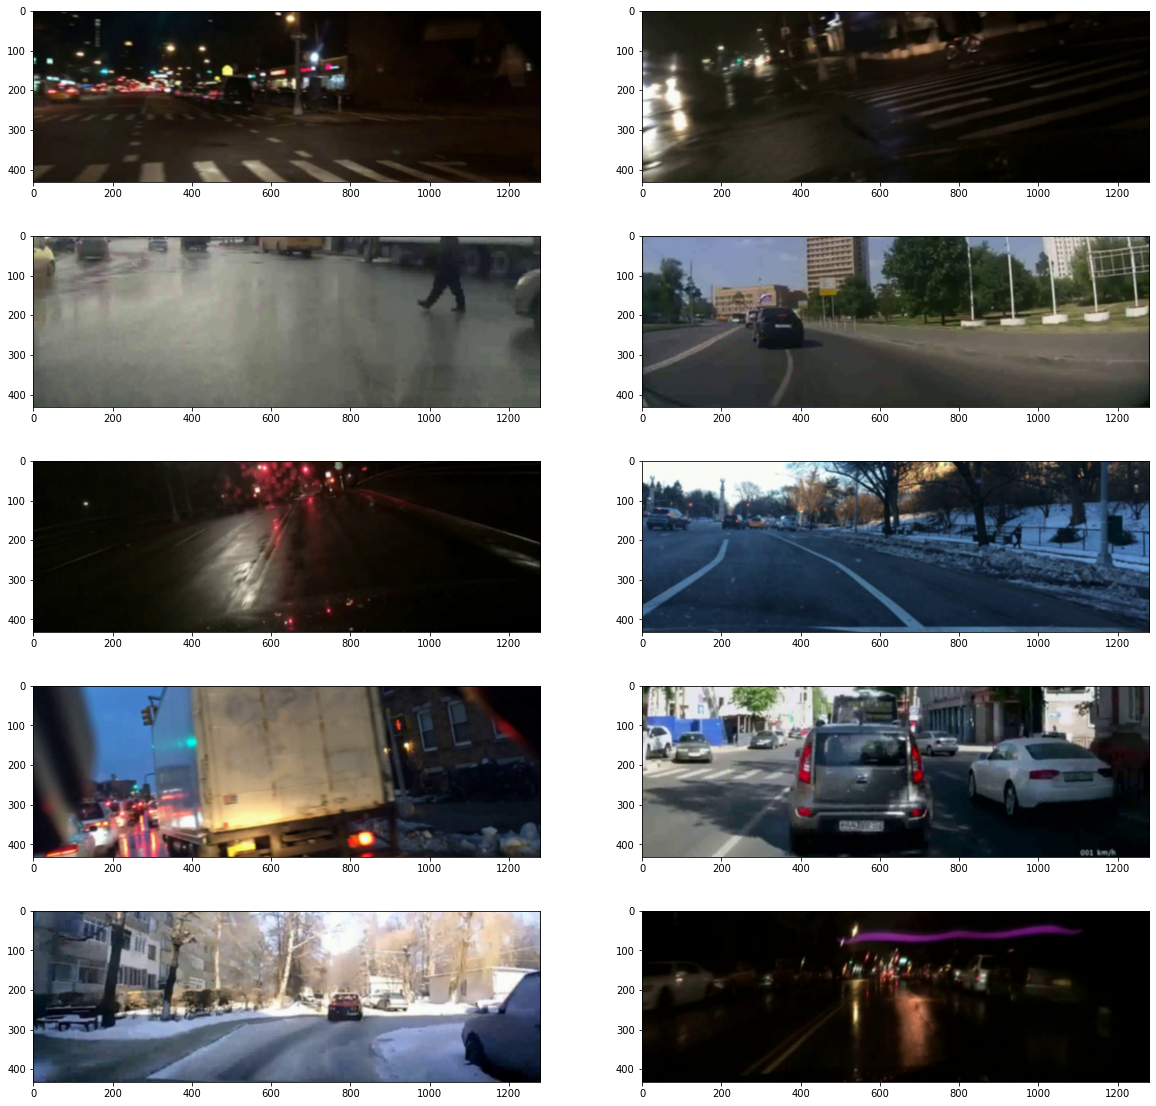

In [8]:
f, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()

for idx, p in enumerate(new_img_list) :
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    upper = int(h/2) - int(h * 0.2)
    bottom = int(h/2) + int(h * 0.4)
    
    img = img[upper:bottom, :, :]
    
    axs[idx].imshow(img)

plt.show()
    

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
path = R"C:\Users\quhb2\Documents\git\toy\car_crash_analyze\data\new_train.csv"
df = pd.read_csv(path)

In [7]:
df.head()

,sample_id,img_path,label
0,TRAIN_0000_000,./data/new_train\TRAIN_0000_000.jpg,7
1,TRAIN_0000_001,./data/new_train\TRAIN_0000_001.jpg,7
2,TRAIN_0000_002,./data/new_train\TRAIN_0000_002.jpg,7
3,TRAIN_0000_003,./data/new_train\TRAIN_0000_003.jpg,7
4,TRAIN_0000_004,./data/new_train\TRAIN_0000_004.jpg,7


In [13]:

train_df, val_df, train_labels, val_labels = train_test_split(
        df.drop(columns=['sample_id']),
        df['label'],
        test_size=0.2,
        random_state=2455
    )

In [14]:
train_df

,img_path,label
168080,./data/new_train\TRAIN_2401_010.jpg,1
73708,./data/new_train\TRAIN_1052_068.jpg,7
79368,./data/new_train\TRAIN_1133_058.jpg,11
70507,./data/new_train\TRAIN_1007_017.jpg,1
41610,./data/new_train\TRAIN_0594_030.jpg,1
...,...,...
179393,./data/new_train\TRAIN_2562_053.jpg,0
109868,./data/new_train\TRAIN_1569_038.jpg,0
182992,./data/new_train\TRAIN_2614_012.jpg,0
26480,./data/new_train\TRAIN_0378_020.jpg,0


## Test 이미지 frame 단위로 저장

In [25]:
path = "./data/test/*"
vid_list = glob(path)

for vid_path in tqdm(vid_list) :
    cap = cv2.VideoCapture(vid_path)
    cnt = 0
    first_15f_chk = 0
    while(cap.isOpened()) :
        ret, frame = cap.read()
        
        if ret:
            vid_path = vid_path.replace("/test\\", "\\new_test\\").replace(".mp4","_")
#             print(vid_path)
            cv2.imwrite(vid_path+str(cnt).zfill(3)+".jpg", frame)
            
            cnt += 1
        
        else :
            break
            
            
        
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [16:35<00:00,  1.81it/s]


## frame 크롭한 이미지 기준으로 새로운 csv 만들기

In [30]:
path = "./data/train.csv"
label_csv = pd.read_csv(path)

path = "./data/train/*.jpg"
img_list = glob(path)

In [31]:
new_label_csv = {
    'sample_id' : [],
    'img_path' : [],
    'label' : []
}

for img_path in tqdm(img_list) :
    ori_sample_id = '_'.join(os.path.basename(img_path).split('_')[:2])
    sample_id = os.path.basename(img_path).replace(".jpg","")
    
    new_label_csv['label'].append(label_csv[label_csv['sample_id']==ori_sample_id]['label'].values[0])
    new_label_csv['img_path'].append(img_path)
    new_label_csv['sample_id'].append(sample_id)
    
new_label_df = pd.DataFrame(new_label_csv)
new_label_df
new_label_df.to_csv('./data/50frame_train.csv',index=False)

100%|████████████████████████████████████████████████████████████████████████████████| 134900/134900 [00:38<00:00, 3525.30it/s]


In [29]:
path = "./data/train.csv"
label_csv = pd.read_csv(path)

path = "./data/new_train/*.jpg"
img_list = glob(path)

In [119]:
label_csv

,sample_id,video_path,label
0,TRAIN_0000,./train/TRAIN_0000.mp4,7
1,TRAIN_0001,./train/TRAIN_0001.mp4,7
2,TRAIN_0002,./train/TRAIN_0002.mp4,0
3,TRAIN_0003,./train/TRAIN_0003.mp4,0
4,TRAIN_0004,./train/TRAIN_0004.mp4,1
...,...,...,...
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3
2694,TRAIN_2694,./train/TRAIN_2694.mp4,5
2695,TRAIN_2695,./train/TRAIN_2695.mp4,0
2696,TRAIN_2696,./train/TRAIN_2696.mp4,0


In [149]:
new_label_csv = {
    'sample_id' : [],
    'img_path' : [],
    'label' : []
}

for img_path in tqdm(img_list) :
    ori_sample_id = '_'.join(os.path.basename(img_path).split('_')[:2])
    sample_id = os.path.basename(img_path).replace(".jpg","")
    
    new_label_csv['label'].append(label_csv[label_csv['sample_id']==ori_sample_id]['label'].values[0])
    new_label_csv['img_path'].append(img_path)
    new_label_csv['sample_id'].append(sample_id)
    
new_label_df = pd.DataFrame(new_label_csv)
new_label_df
new_label_df.to_csv('./data/new_train.csv',index=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188860/188860 [00:53<00:00, 3509.47it/s]


In [7]:
p = "./data/50frame_train.csv"

df = pd.read_csv(p)

pl = []
for path in df['img_path'] : 
    pl.append(path.replace('/train\\', '/50frame_train\\'))
    
df['img_path'] = pl

df

,sample_id,img_path,label
0,TRAIN_0000_000,./data/50frame_train\TRAIN_0000_000.jpg,7
1,TRAIN_0000_001,./data/50frame_train\TRAIN_0000_001.jpg,7
2,TRAIN_0000_002,./data/50frame_train\TRAIN_0000_002.jpg,7
3,TRAIN_0000_003,./data/50frame_train\TRAIN_0000_003.jpg,7
4,TRAIN_0000_004,./data/50frame_train\TRAIN_0000_004.jpg,7
...,...,...,...
134895,TRAIN_2697_045,./data/50frame_train\TRAIN_2697_045.jpg,0
134896,TRAIN_2697_046,./data/50frame_train\TRAIN_2697_046.jpg,0
134897,TRAIN_2697_047,./data/50frame_train\TRAIN_2697_047.jpg,0
134898,TRAIN_2697_048,./data/50frame_train\TRAIN_2697_048.jpg,0


In [9]:
df.to_csv(p, index=False)

In [2]:
model_preds = [[], [], []]
 
model_preds[0] += [12,12]
model_preds[0] += [12,12]
model_preds[0] += [12,12]

model_preds

[[12, 12, 12, 12, 12, 12], [], []]

: 

In [7]:
path = './data/50f_EgoCrash_train.csv'

df = pd.read_csv(path)

,sample_id,img_path,label
0,TRAIN_0000_000,./data/50frame_train\TRAIN_0000_000.jpg,1
1,TRAIN_0000_001,./data/50frame_train\TRAIN_0000_001.jpg,1
2,TRAIN_0000_002,./data/50frame_train\TRAIN_0000_002.jpg,1
3,TRAIN_0000_003,./data/50frame_train\TRAIN_0000_003.jpg,1
4,TRAIN_0000_004,./data/50frame_train\TRAIN_0000_004.jpg,1
...,...,...,...
134895,TRAIN_2697_045,./data/50frame_train\TRAIN_2697_045.jpg,0
134896,TRAIN_2697_046,./data/50frame_train\TRAIN_2697_046.jpg,0
134897,TRAIN_2697_047,./data/50frame_train\TRAIN_2697_047.jpg,0
134898,TRAIN_2697_048,./data/50frame_train\TRAIN_2697_048.jpg,0


In [12]:
'_'.join(df['sample_id'][0].split('_')[:2])

'TRAIN_0000'

In [26]:
label_list = []
img_path_list = []
sample_id_list = []
for i in range(int(len(df)/50)) :
    div_df = df.iloc[i*50:i*50+50]
    
    img_path = div_df['img_path'][i*50].replace('_'+div_df['img_path'][i*50].split('_')[-1], '.jpg')
    img_path = img_path.replace("/50frame_train","/mosaic_train")
    sample_id = '_'.join(div_df['sample_id'][i*50].split('_')[:2])
    
    label_list.append(div_df['label'].unique().item())
    img_path_list.append(img_path)
    sample_id_list.append(sample_id)

In [29]:
_df_ = pd.DataFrame({
    "sample_id" : sample_id_list,
    "img_path" : img_path_list,
    'label' : label_list
})

In [32]:
_df_.to_csv("./data/mosaic_EgoCrash_train.csv", index=False)

: 

## timm 모델 리스트 확인

In [1]:
import timm
timm.list_models(pretrained=True)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_rw_224',
 'coatnet_1_rw_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_rw_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_2_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'coatnext_nano_rw_224',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_

## 2개 PRED 합치기

In [26]:
p = './data/50f_weather_train.csv'

df = pd.read_csv(p)
df


,sample_id,img_path,label
0,TRAIN_0000_000,./data/50frame_train\TRAIN_0000_000.jpg,0
1,TRAIN_0000_001,./data/50frame_train\TRAIN_0000_001.jpg,0
2,TRAIN_0000_002,./data/50frame_train\TRAIN_0000_002.jpg,0
3,TRAIN_0000_003,./data/50frame_train\TRAIN_0000_003.jpg,0
4,TRAIN_0000_004,./data/50frame_train\TRAIN_0000_004.jpg,0
...,...,...,...
45745,TRAIN_2694_045,./data/50frame_train\TRAIN_2694_045.jpg,2
45746,TRAIN_2694_046,./data/50frame_train\TRAIN_2694_046.jpg,2
45747,TRAIN_2694_047,./data/50frame_train\TRAIN_2694_047.jpg,2
45748,TRAIN_2694_048,./data/50frame_train\TRAIN_2694_048.jpg,2


In [32]:
import copy
pred_list_1 = list(copy.deepcopy(df['label']))
pred_list_2 = list(copy.deepcopy(df['label']))

In [34]:
pred_list = []
p_thrs = 10

for i in range(0, len(pred_list_1), 50) :
    label_0 = pred_list_1[i : i+50].count(0) + pred_list_2[i : i+50].count(0)
    label_1 = pred_list_1[i : i+50].count(1) + pred_list_2[i : i+50].count(1)
    label_2 = pred_list_1[i : i+50].count(2) + pred_list_2[i : i+50].count(2)
    
    if label_1 > p_thrs or label_2 > p_thrs:
        p_1 = 1 if label_1 > label_2 else 2
    else :
        p_1 = 0
    
    # if pred_list_2[2][i : i+50].count(1) > p3_thrs or pred_list_2[2][i : i+50].count(2) > p3_thrs:
    #     p_2 = 1 if pred_list_2[2][i : i+50].count(1) > pred_list_2[2][i : i+50].count(2) else 2
    # else :
    #     p_2 = 0
    
    
    
    # print([preds[0][i : i+50].count(0), preds[0][i : i+50].count(1)], 
    #       [preds[1][i : i+50].count(0), preds[1][i : i+50].count(1), preds[1][i : i+50].count(2)], 
    #       [preds[2][i : i+50].count(0), preds[2][i : i+50].count(1), preds[2][i : i+50].count(2)]
    print(int(i/50), [label_0, label_1, label_2])
    
    # pred_list.append([p_1, p_2, p_3])
    pred_list.append(p)

0 [100, 0, 0]
1 [100, 0, 0]
2 [100, 0, 0]
3 [0, 100, 0]
4 [100, 0, 0]
5 [0, 100, 0]
6 [100, 0, 0]
7 [100, 0, 0]
8 [100, 0, 0]
9 [100, 0, 0]
10 [100, 0, 0]
11 [100, 0, 0]
12 [0, 100, 0]
13 [100, 0, 0]
14 [0, 100, 0]
15 [100, 0, 0]
16 [100, 0, 0]
17 [0, 0, 100]
18 [100, 0, 0]
19 [100, 0, 0]
20 [100, 0, 0]
21 [100, 0, 0]
22 [100, 0, 0]
23 [0, 100, 0]
24 [100, 0, 0]
25 [100, 0, 0]
26 [100, 0, 0]
27 [100, 0, 0]
28 [100, 0, 0]
29 [100, 0, 0]
30 [100, 0, 0]
31 [100, 0, 0]
32 [100, 0, 0]
33 [100, 0, 0]
34 [100, 0, 0]
35 [100, 0, 0]
36 [100, 0, 0]
37 [100, 0, 0]
38 [100, 0, 0]
39 [100, 0, 0]
40 [100, 0, 0]
41 [100, 0, 0]
42 [100, 0, 0]
43 [100, 0, 0]
44 [100, 0, 0]
45 [100, 0, 0]
46 [0, 100, 0]
47 [0, 100, 0]
48 [100, 0, 0]
49 [100, 0, 0]
50 [100, 0, 0]
51 [100, 0, 0]
52 [100, 0, 0]
53 [100, 0, 0]
54 [0, 100, 0]
55 [100, 0, 0]
56 [100, 0, 0]
57 [100, 0, 0]
58 [0, 100, 0]
59 [0, 100, 0]
60 [100, 0, 0]
61 [100, 0, 0]
62 [100, 0, 0]
63 [100, 0, 0]
64 [0, 0, 100]
65 [100, 0, 0]
66 [100, 0, 0]
67 [1

In [25]:
for i in range(0, len(pred_list_1), 50) :
    print(pred_list_1[i : i + 50].values)
    print(pred_list_2[i : i + 50].values)
    

[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7]
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7]
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7]
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [16]:
apred_list_1[0] = 7
print(pred_list_2)
print(pred_list_1)

0         7
1         7
2         7
3         7
4         7
         ..
134895    0
134896    0
134897    0
134898    0
134899    0
Name: label, Length: 134900, dtype: int64
0         7
1         7
2         7
3         7
4         7
         ..
134895    0
134896    0
134897    0
134898    0
134899    0
Name: label, Length: 134900, dtype: int64


In [3]:
import timm

timm.list_models(pretrained=True)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_t